### Intro
* A replication for Greve's paper [Sticky Aspirations: Organizational Time Perspective and Competitiveness](https://pubsonline.informs.org/doi/10.1287/orsc.13.1.1.540) on organization science in 2002. 
* Organization evaluate performance based on aspiration level
    1. Aspiration level could be divided into social aspiration level and historical aspiration level, this paper focus on historical aspiration. 
    2. Organizations take less risk when they outperform the aspiration level and be more risk taking when they're below the aspiration level. 
    3. Adjustment of historical aspiration levels could be categorized into quick and slow  
        a) firm adjust to historical aspiration level slowly due to the existance of routines   
        b) firm may adjust to historical aspiration level quickly due to emperical evidence that most firms are inert to recognize their failure, managers are rewarded for agile response and decision makers prefer recent information than remote one. 
* From an industry level, 
    1. competition/failure rate is related with the number of firms (large number leads to furious competition while small number indicates a lack of legitmacy)
    2. newly founded firms are more likely to fail compared with newly founded affiliates of existing firms

### Notation
* Historical aspiration could be represented as the weighted sum of previous performance and previous aspiration
$$
L_t = AL_{t-1} + (1-A)Y_{t-1}
\tag{1}
$$ 
* Organizations are in an enviroment that rewarded them according to
$$
Y_t = S_t + u \epsilon_t \\
\tag{2}
where\ Y_t\ represents\ the\ performance,\ S_t\ is\ the\ strategy\ that\ time,\ u\ represents\ the\ uncertainty\ level\ and\ \epsilon\ is\ the\ randomness\ of\ each\ firm\
$$
* Organizations evaluate current performance by comparing it with aspiration level according to equation (1). The probability of changing is determined by the logit function
$$
Log(P(change)/P(no change)) = -2.0 - (Y_t-L_t)I_{Y_t>L_t} - 0.25(Y_t-L_t)I_{Y_t<=L_t} \\
\tag{3}
which\ is\ generated\ from\ previous\ empirical\ research
$$
* When we take industry factor into consideration (replace firms at tail with new firms), we set cut-off threshold as 
$$
c\\
\tag{4}
c\ represent\ the\ cut-off\ standard\ deviations\ below\ mean\ and\ is\ set\ to\ 1.28\\ initially\ and gives\ an\ expected\ failure\ rate\ of\ 10\%\ per\ period
$$
* Removed organizations were replaced by organizations whose form was drawn with probability proportional to the number of each firm or the sum of strategies of each form in the population. 

### Simulation

###### simulation without replacement

In [202]:
import numpy as np
import matplotlib.pyplot as plt

agent_number = 2000
initial_state = np.random.normal(0,1,(1,agent_number))
initial_strategy = np.random.normal(0,1,(1,agent_number))
initial_aspiration = np.random.normal(0,1,(1,agent_number))
# initial_state = np.zeros((1,agent_number))
# initial_strategy = np.zeros((1,agent_number))
# initial_aspiration = np.zeros((1,agent_number))

def simulateWithoutRep(A, uncertainty, period):
    res = np.zeros((period+1,agent_number))
    res[0] = np.array(initial_state)
    strategy = np.array(initial_strategy)
    aspiration = np.array(initial_aspiration)
    c = 0
    for step in range(period):
        performance = strategy + uncertainty*np.random.normal(0,1,(1,agent_number))
        res[step+1] = performance
        aspiration = np.array(A*aspiration+(1-A)*res[step])
        
        I_large = np.where(performance>aspiration,1,0)
        I_small = np.where(performance<aspiration,1,0)
        
        temp = -2.0-(performance-aspiration)*I_large-(performance-aspiration)*0.25*I_small
        probability = np.exp(temp)/(np.exp(temp)+1)
        random_pro = np.random.uniform(0,1,(1,agent_number))
        
        index = np.where(probability>=random_pro,1,0)
        c+=np.sum(index)
        strategy = strategy-index*strategy+np.random.normal(0,1,(1,agent_number))*index
    print("probability of change, %f"%(1.0*c/(agent_number*period)))
    return res            

In [203]:
res1 = simulateWithoutRep(0.5,1,250)
res2 = simulateWithoutRep(0.7,1,250)
res3 = simulateWithoutRep(0.9,1,250)

probability of change, 0.104012
probability of change, 0.103538
probability of change, 0.103782


In [204]:
np.mean(res1)

0.06292031728468878

In [205]:
np.var(np.mean(res1,axis=-1))

0.0009794608883009976

In [206]:
np.mean(res2)

0.10725007849233396

In [207]:
np.var(np.mean(res2,axis=-1))

0.0012804210967140037

In [208]:
np.mean(res3)

0.2184882228856558

In [209]:
np.var(np.mean(res3,axis=-1))

0.0015149873616555377

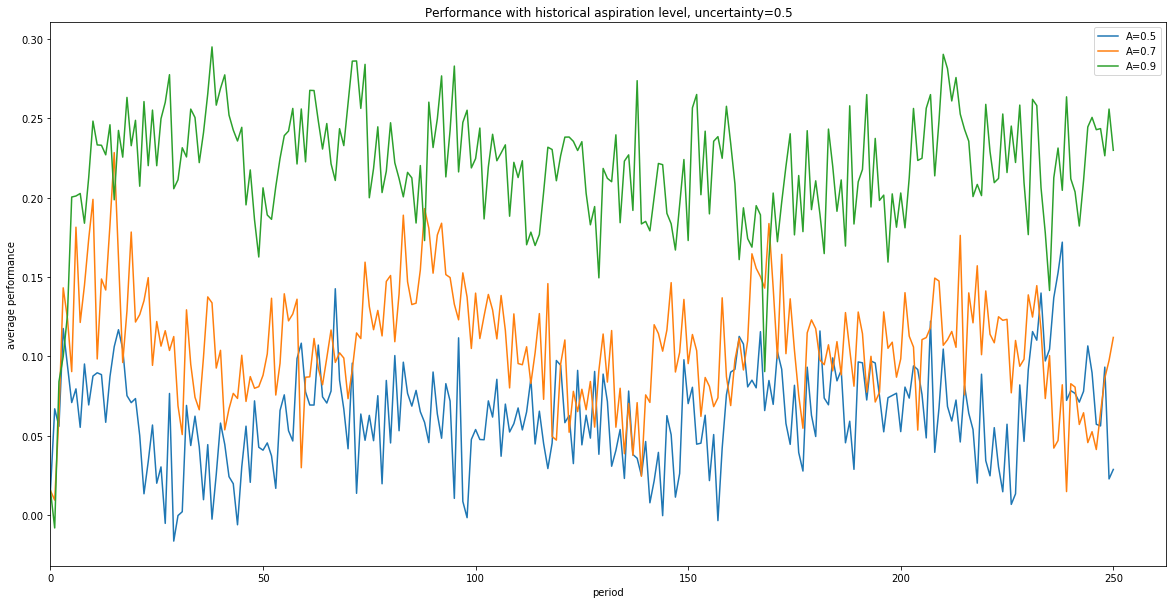

In [210]:
f = plt.figure(figsize=(20,10))
plt.plot(np.mean(res1,axis=-1),label="A=0.5")
plt.plot(np.mean(res2,axis=-1),label="A=0.7")
plt.plot(np.mean(res3,axis=-1),label="A=0.9")
plt.title("Performance with historical aspiration level, uncertainty=0.5")
plt.xlim(0)
plt.xlabel("period")
plt.ylabel("average performance")
plt.legend()

In [211]:
res1 = simulateWithoutRep(0.5,2,250)
res2 = simulateWithoutRep(0.7,2,250)
res3 = simulateWithoutRep(0.9,2,250)

probability of change, 0.110672
probability of change, 0.108718
probability of change, 0.108622


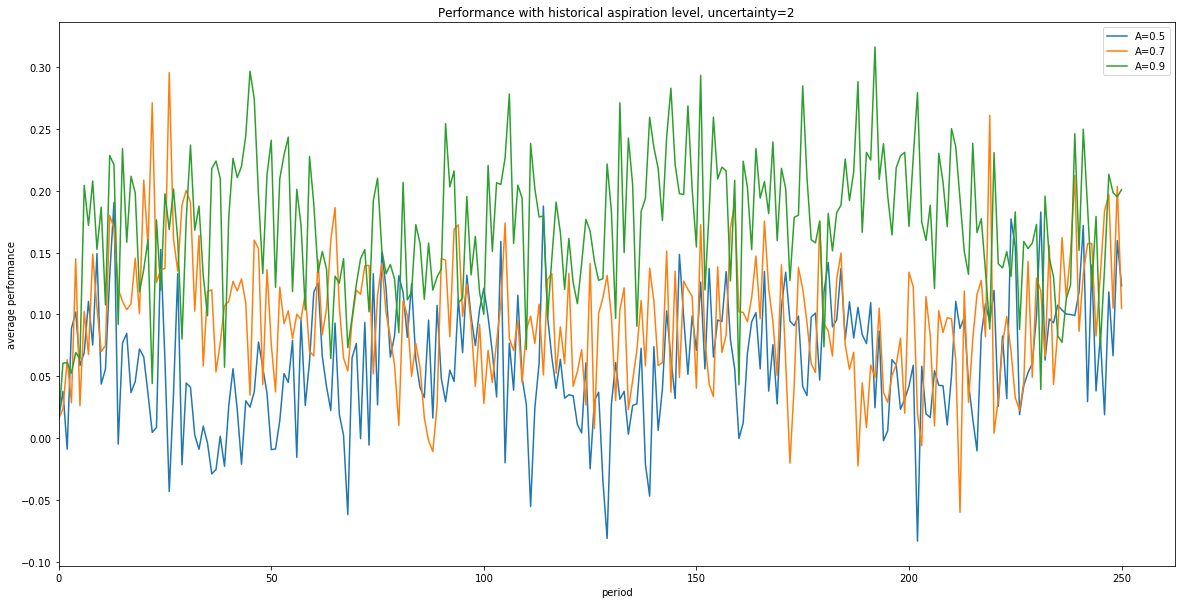

In [212]:
f = plt.figure(figsize=(20,10))
plt.plot(np.mean(res1,axis=-1),label="A=0.5")
plt.plot(np.mean(res2,axis=-1),label="A=0.7")
plt.plot(np.mean(res3,axis=-1),label="A=0.9")
plt.title("Performance with historical aspiration level, uncertainty=2")
plt.xlim(0)
plt.xlabel("period")
plt.ylabel("average performance")
plt.legend()

In [213]:
np.mean(res1)

0.06121395037398199

In [214]:
np.var(np.mean(res1,axis=-1))

0.002527964403154989

In [215]:
np.mean(res2)

0.09631244988101895

In [216]:
np.var(np.mean(res2,axis=-1))

0.0027669852389043117

In [217]:
np.mean(res3)

0.1722663912773734

In [218]:
np.var(np.mean(res3,axis=-1))

0.003094537521453967

##### Implication
* Slow updater gets better performance
* The difference in performance between slow and rapid aspiration-level updaters was not because of different level of changes, it it because of the timing of changing. 

###### Simulation with replacement

In [336]:
agent_number = 200

As = np.array([
    [0.5]*agent_number,
    [0.6]*agent_number,
    [0.7]*agent_number,
    [0.8]*agent_number,
    [0.9]*agent_number,
]).flatten().reshape((1,-1))

initial_state = np.random.normal(0,1,(1,agent_number*5))
initial_strategy = np.random.normal(0,1,(1,agent_number*5))
initial_aspiration = np.random.normal(0,1,(1,agent_number*5))

def simulateWithRep(uncertainty, period, cutoff):
    
    performance = np.array(initial_state)
    strategy = np.array(initial_strategy)
    aspiration = np.array(initial_aspiration)
    
    res = [[0.2,0.2,0.2,0.2,0.2]]
    
    for step in range(period):
        aspiration = np.array(As*aspiration+(1-As)*performance)
        performance = strategy + uncertainty*np.random.normal(0,1,(1,agent_number*5))
        
        I_large = np.where(performance>aspiration,1,0)
        I_small = np.where(performance<aspiration,1,0)
        
        temp = -2.0-(performance-aspiration)*I_large-(performance-aspiration)*0.25*I_small
        probability = np.exp(temp)/(np.exp(temp)+1)
        random_pro = np.random.uniform(0,1,(1,agent_number*5))
        
        index = np.where(probability>=random_pro,1,0)
        strategy = strategy-index*strategy+np.random.normal(0,1,(1,agent_number*5))*index
        
        percentile = np.percentile(performance,cutoff)
        replacement = np.where(performance<percentile)[1]
        
        no_replacement = np.where(performance>=percentile)[1]
        
#         print(len(replacement))
        probs = [
            sum(As[0][no_replacement]==0.5)/len(no_replacement),
            sum(As[0][no_replacement]==0.6)/len(no_replacement),
            sum(As[0][no_replacement]==0.7)/len(no_replacement),
            sum(As[0][no_replacement]==0.8)/len(no_replacement),
            sum(As[0][no_replacement]==0.9)/len(no_replacement),
        ]
        res.append(list(probs))
        new = np.random.choice([0.5,0.6,0.7,0.8,0.9],len(replacement),p=probs).reshape(1,-1)
        
        As[0][replacement] = new
        strategy[0][replacement] = np.random.normal(0,1,(1,len(replacement)))
        performance[0][replacement] = np.random.normal(0,1,(1,len(replacement)))
        aspiration[0][replacement] = np.random.normal(0,1,(1,len(replacement)))
    return np.array(res)

In [319]:
res = simulateWithRep(1,500,10)

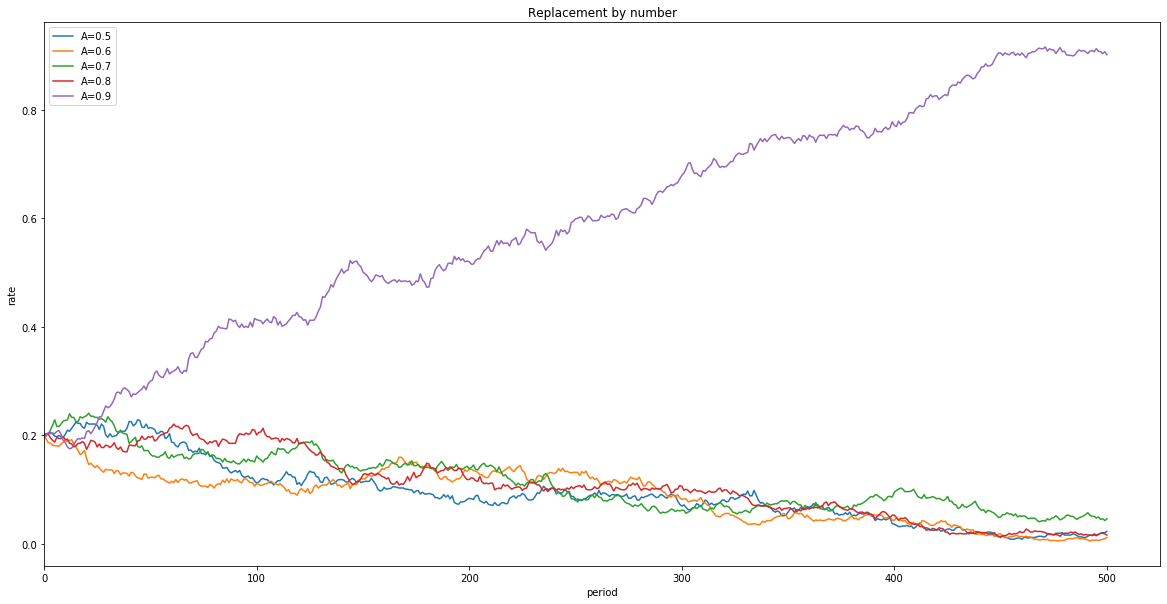

In [321]:
f = plt.figure(figsize=(20,10))
plt.plot(res[:,0],label="A=0.5")
plt.plot(res[:,1],label="A=0.6")
plt.plot(res[:,2],label="A=0.7")
plt.plot(res[:,3],label="A=0.8")
plt.plot(res[:,4],label="A=0.9")
plt.legend()
plt.xlim(0)
plt.xlabel("period")
plt.ylabel("rate")
plt.title("Replacement by number")
plt.show()

In [337]:
res = simulateWithRep(1,500,20)

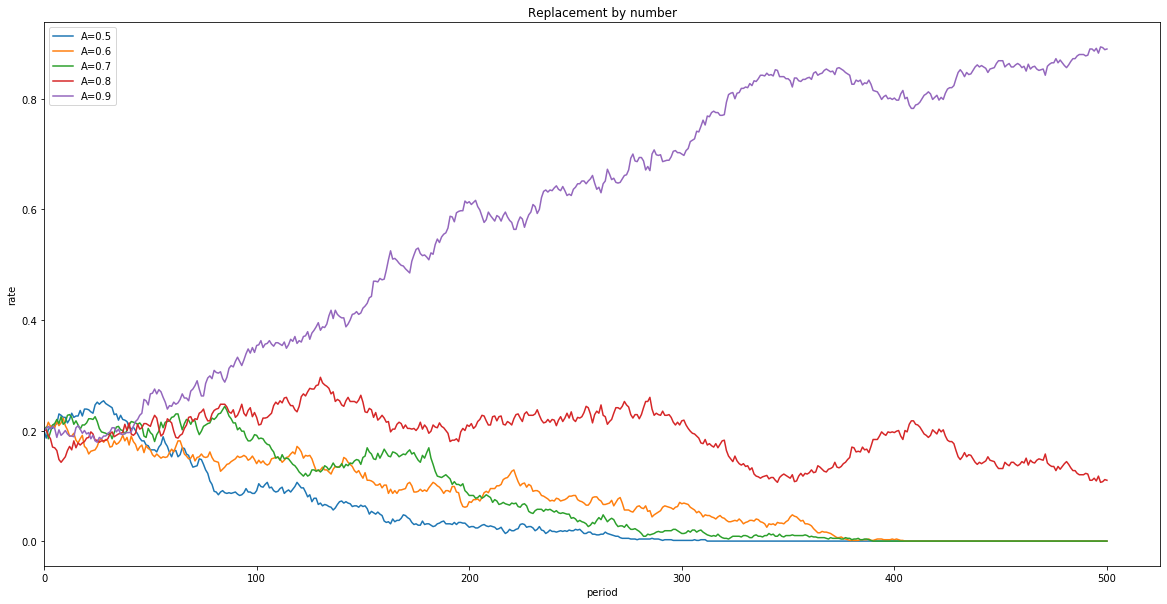

In [338]:
f = plt.figure(figsize=(20,10))
plt.plot(res[:,0],label="A=0.5")
plt.plot(res[:,1],label="A=0.6")
plt.plot(res[:,2],label="A=0.7")
plt.plot(res[:,3],label="A=0.8")
plt.plot(res[:,4],label="A=0.9")
plt.legend()
plt.xlim(0)
plt.xlabel("period")
plt.ylabel("rate")
plt.title("Replacement by number")
plt.show()

###### Implication
* Slow firms gradually dominate the industry
* As the cut-off threshold increase (competition becomes more intensive), replacement of organizations with rapid aspiration-level updating by organizations with slow aspiration-level updating would become quicker  

###### Corresponding prediction
* Organizations in populations with high density have slower aspiration-level updating than organizations in populations with low density.
* Unit organizations will have slower aspiration-level updating than branch organizations.

### Potential extension
* From historical aspiration to social aspiration 
* The idea of competition in this paper is illustrated by death rate/replacement procedure in industry -> still not  strict competition
* Fixed industry -> what about a more open industry/platform -> make the cake bigger
* Fixed speed -> the decision for startups and giants would be different -> in this case there is no historical aspiration for startup